Time Series
===
is a sequences of data with time vaiable, $\{X_t\}$, where the time variable $t$ is discrete or continuous.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.signal import savgol_filter
import plotly.express as px

In [ ]:
# prompt: use yfinace to download APPL and NVDA stock prices in daily since two 2019

import yfinance as yf

# Download Apple stock prices from 2019-01-01 to present
aapl = yf.download('AAPL', start='2019-01-01')

# Download Nvidia stock prices from 2019-01-01 to present
nvda = yf.download('NVDA', start='2019-01-01')


In [ ]:
# import ticks togeter
import yfinance as yf
import pandas as pd

ticks= 'AAPL NVDA'
df= yf.download(ticks, start='2019-01-01')['Close']
df.head()

[*********************100%%**********************]  2 of 2 completed


Ticker,AAPL,NVDA
Date,,
2019-01-02,39.480000,3.40550
2019-01-03,35.547501,3.19975
2019-01-04,37.064999,3.40475
2019-01-07,36.982498,3.58500
2019-01-08,37.687500,3.49575


<Axes: xlabel='Date'>

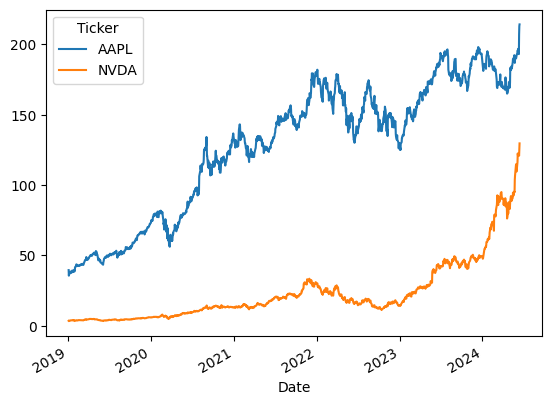

In [ ]:
# prompt: visualize

df.plot()


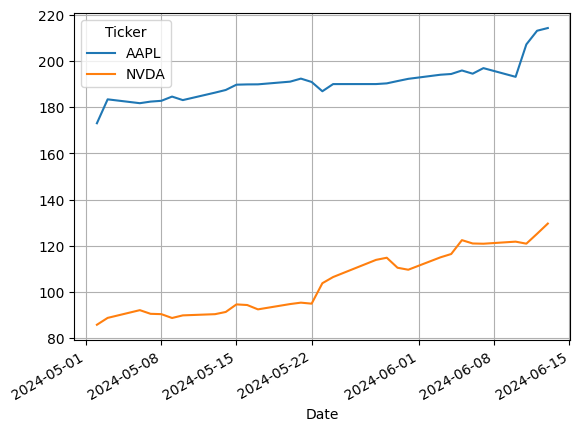

In [ ]:
import matplotlib.pyplot as plt
df.iloc[-30:,:].plot()
plt.grid()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1372 entries, 2019-01-02 to 2024-06-13
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1372 non-null   float64
 1   NVDA    1372 non-null   float64
dtypes: float64(2)
memory usage: 32.2 KB


In [ ]:
import plotly.express as px

fig = px.line(df, x='Date', y=['AAPL','NVDA'],
              width=800,height=400,
              line_shape='linear')
fig.update_layout(title_text='Stock Price', title_x=0.5)

fig.show()

In [ ]:
# the most simple way
px.line(df,x='Date',y=['AAPL','NVDA'])

In [ ]:
pip install -q pyecharts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.3/146.3 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 11.4 MB/s eta 0:00:00


In [ ]:
# prompt: use pyecharts to visualize

from pyecharts.charts import Line

# Create a Kline object
#line = Line("AAPL and NVDA Stock Prices")
line=(
  Line()
  # Add the data to the Line object, only list data accepted
  .add_xaxis(df.index.tolist())
  .add_yaxis('Apple Inc',df['AAPL'].values.tolist())
  .add_yaxis('Nvidia',df['NVDA'].values.tolist())
    )



In [ ]:
# generte HTML file
line.render()

'/content/render.html'

In [ ]:
from IPython.display import HTML
HTML("render.html")

Questions
---
1. What happens in the past?
2. What are the trends? Cow or Bear?
3. Future Prediction
4. ...

One of the important observation is "curve smoothing".



In [ ]:
# get out the data, NVDA, for example
df_AAPL=df[['AAPL']]
df_NVDA=df[['NVDA']]

In [ ]:
df_AAPL['ds']=list(df_AAPL.index)
df_NVDA['ds']=list(df_NVDA.index)

<ipython-input-126-af3a16220a38>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-126-af3a16220a38>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# I will need this list to plot later the smoothed series
computed_features = []

for window_size in [5, 22]:
  df_AAPL.loc[:,f'{window_size}_MA'] = df_AAPL['AAPL'].rolling(window=window_size).mean()#, center=True).mean()
  #df_train.loc[:,f'savgol_filter_{window_size}'] = savgol_filter(df_train['y'], window_size, 2)
  computed_features.append(f'{window_size}_MA')
  #computed_features.append(f'savgol_filter_{window_size}')

In [ ]:
#df_AAPL['Date']=df_AAPL.index
px.line(df_AAPL,x='ds',y=['AAPL','5_MA','22_MA'])

In [ ]:
computed_features = []

for window_size in [5, 22]:
  #df_AAPL.loc[:,f'savgol_filter_{window_size}_MA'] = df_AAPL['AAPL'].rolling(window=window_size).mean()#, center=True).mean()
  df_AAPL.loc[:,f'savgol_filter_{window_size}'] = savgol_filter(df_AAPL['AAPL'], window_size, 2)
  #computed_features.append(f'{window_size}_MA')
  computed_features.append(f'savgol_filter_{window_size}')

In [ ]:
px.line(df_AAPL,x='ds',y=['AAPL','5_MA','22_MA','savgol_filter_5','savgol_filter_22'])

In [ ]:
computed_features = []

for window_size in [5, 22]:
  df_NVDA.loc[:,f'{window_size}_MA'] = df_NVDA['NVDA'].rolling(window=window_size).mean()#, center=True).mean()
  #df_train.loc[:,f'savgol_filter_{window_size}'] = savgol_filter(df_train['y'], window_size, 2)
  df_NVDA.loc[:,f'savgol_filter_{window_size}'] = savgol_filter(df_NVDA['NVDA'], window_size, 2)

  computed_features.append(f'{window_size}_MA')
  computed_features.append(f'savgol_filter_{window_size}')

In [ ]:
px.line(df_NVDA,x='ds',y=['NVDA','5_MA','22_MA','savgol_filter_5','savgol_filter_22'])

Conclusion
---
1. the Savitzky-Golay filter  captures the seasonality of the time series with no delay and removing the spikes,
2.  the moving average `focused` all its attention to the long term average, but losw many pieces of information contained in the signal.
3. `5-days` is also called "weekly moving average", and `22-days` called "monthly moving average".  